# Data Warehousing and Data Mining

## Labs

### Prepared by Gilroy Gordon

#### Contact Information

SCIT ext. 3643

ggordonutech@gmail.com

gilroy.gordon@utech.edu.jm

### Week 3 - Decision Trees in Python


Additional Reference Resources:

http://scikit-learn.org/stable/modules/tree.html

Objectives
----
---
     
     > Data Selection
     > Data Preprocessing
         > Noisy Data - Invalid Attribute Values
         > Casewise Deletion
     > Data Transformation
         > Dummy Encoding
     > Data Mining
          > Decision Trees
     > Model Evaluation and Prediction
          > Train/Test Split - 70/30
     > Presentation
          > Tree Chart
          > Tree Rules
          > Confusion Matrix
    

----

## Import required libraries and acquire data

NB. The data required was retrieved from the required text for this course. This should assist you in following the concepts from the book better

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data_path = './data/Creditcardprom.xls' # Path to data file
data = pd.read_excel(data_path)  # read data from an excel file

In [45]:
data #view the data

,Income Range,Magazine Promo,Watch Promo,Life Ins Promo,Credit Card Ins.,Sex,Age
2,"40-50,000",Yes,No,No,No,Male,45
3,"30-40,000",Yes,Yes,Yes,No,Female,40
4,"40-50,000",No,No,No,No,Male,42
5,"30-40,000",Yes,Yes,Yes,Yes,Male,43
6,"50-60,000",Yes,No,Yes,No,Female,38
7,"20-30,000",No,No,No,No,Female,55
8,"30-40,000",Yes,No,Yes,Yes,Male,35
9,"20-30,000",No,Yes,No,No,Male,27
10,"30-40,000",Yes,No,No,No,Male,43
11,"30-40,000",Yes,Yes,Yes,No,Female,41


In [5]:
# What columns are in the data set ? Do they have spaces that I should consider
data.columns

Index(['Income Range', 'Magazine Promo', 'Watch Promo', 'Life Ins Promo',
       'Credit Card Ins.', 'Sex', 'Age'],
      dtype='object')

In [6]:
# The first two(2) rows have invalid data. Let us perform casewise deletion to remove these rows from the data set
data = data.drop([0,1],axis=0) # dropping items 0 and 1 from axis 0 or the x axis (rows)
data #viewing data

,Income Range,Magazine Promo,Watch Promo,Life Ins Promo,Credit Card Ins.,Sex,Age
2,"40-50,000",Yes,No,No,No,Male,45
3,"30-40,000",Yes,Yes,Yes,No,Female,40
4,"40-50,000",No,No,No,No,Male,42
5,"30-40,000",Yes,Yes,Yes,Yes,Male,43
6,"50-60,000",Yes,No,Yes,No,Female,38
7,"20-30,000",No,No,No,No,Female,55
8,"30-40,000",Yes,No,Yes,Yes,Male,35
9,"20-30,000",No,Yes,No,No,Male,27
10,"30-40,000",Yes,No,No,No,Male,43
11,"30-40,000",Yes,Yes,Yes,No,Female,41


In [7]:
# We are only interested in a few columns
# extracting only sex, age and income,range, watch promo and life insurance promo
data2 = data[['Income Range','Sex','Age', 'Watch Promo', 'Life Ins Promo']]
data2

,Income Range,Sex,Age,Watch Promo,Life Ins Promo
2,"40-50,000",Male,45,No,No
3,"30-40,000",Female,40,Yes,Yes
4,"40-50,000",Male,42,No,No
5,"30-40,000",Male,43,Yes,Yes
6,"50-60,000",Female,38,No,Yes
7,"20-30,000",Female,55,No,No
8,"30-40,000",Male,35,No,Yes
9,"20-30,000",Male,27,Yes,No
10,"30-40,000",Male,43,No,No
11,"30-40,000",Female,41,Yes,Yes



## Aim : Use a decision tree to identify suitable rules for a Life Ins Promo


NB. The decision tree from sklearn library (http://scikit-learn.org/stable/modules/tree.html) only accepts float/integer values for variables. We must therefore transform the data before applying the algorithm

I have created a function below ```create_label_encoder_dict``` to assist with this. The function accepts a dataframe object and uses the ```LabelEncoder``` class from ```sklearn.preprocessing``` to encode (dummy encoding) or transform non-numerical columns to numbers. Finally it returns a dictionary object of all the encoders created for each column.

The LabelEncoder is a useful resource as it not only automatically transforms all values in a column but also keeps a track of what values were transformed from. i.e. It will change all ```Female``` to ```0``` and all ```Male``` to ```1```

In [8]:
def create_label_encoder_dict(df):
    from sklearn.preprocessing import LabelEncoder
    
    label_encoder_dict = {}
    for column in df.columns:
        # Only create encoder for categorical data types
        if not np.issubdtype(df[column].dtype, np.number) and column != 'Age':
            label_encoder_dict[column]= LabelEncoder().fit(df[column])
    return label_encoder_dict

In [9]:
label_encoders = create_label_encoder_dict(data2)
print("Encoded Values for each Label")
print("="*32)
for column in label_encoders:
    print("="*32)
    print('Encoder(%s) = %s' % (column, label_encoders[column].classes_ ))
    print(pd.DataFrame([range(0,len(label_encoders[column].classes_))], columns=label_encoders[column].classes_, index=['Encoded Values']  ).T)

Encoded Values for each Label
Encoder(Watch Promo) = ['No' 'Yes']
     Encoded Values
No                0
Yes               1
Encoder(Life Ins Promo) = ['No' 'Yes']
     Encoded Values
No                0
Yes               1
Encoder(Sex) = ['Female' 'Male']
        Encoded Values
Female               0
Male                 1
Encoder(Income Range) = ['20-30,000' '30-40,000' '40-50,000' '50-60,000']
           Encoded Values
20-30,000               0
30-40,000               1
40-50,000               2
50-60,000               3


In [10]:
# Apply each encoder to the data set to obtain transformed values
data3 = data2.copy() # create copy of initial data set
for column in data3.columns:
    if column in label_encoders:
        data3[column] = label_encoders[column].transform(data3[column])

print("Transformed data set")
print("="*32)
data3

Transformed data set


,Income Range,Sex,Age,Watch Promo,Life Ins Promo
2,2,1,45,0,0
3,1,0,40,1,1
4,2,1,42,0,0
5,1,1,43,1,1
6,3,0,38,0,1
7,0,0,55,0,0
8,1,1,35,0,1
9,0,1,27,1,0
10,1,1,43,0,0
11,1,0,41,1,1


In [11]:
# separate our data into dependent (Y) and independent(X) variables
X_data = data3[['Income Range','Sex','Age', 'Watch Promo']]
Y_data = data3['Life Ins Promo']

## 70/30 Train Test Split

We will split the data using a 70/30 split. i.e. 70% of the data will be randomly chosen to train the model
and 30% will be used to evaluate the model

In [15]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.30) 

In [12]:
# import Decision Tree Classifier

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [46]:
# Create the classifier with a maximum depth of 2 using entropy as the criterion for choosing most significant nodes
# to build the tree
clf = DecisionTreeClassifier(criterion='entropy',min_samples_split=2) 
# Hint : Change the max_depth to 10 or another number to see how this affects the tree

In [47]:
# Build the classifier  by training it on the training data
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Tree Visualization

In [16]:
# What were the determinant features?

In [48]:
pd.DataFrame([ "%.2f%%" % perc for perc in (clf.feature_importances_ * 100) ], index = X_data.columns, columns = ['Feature Significance in Decision Tree'])

,Feature Significance in Decision Tree
Income Range,15.55%
Sex,43.25%
Age,20.60%
Watch Promo,20.60%


In [49]:
import graphviz

In [20]:
dot_data = tree.export_graphviz(clf,out_file=None, 
                                feature_names=X_data.columns, 
                         class_names=label_encoders[Y_data.name].classes_,  
                         filled=True, rounded=True,  proportion=True,
                                node_ids=True, #impurity=False,
                         special_characters=True)

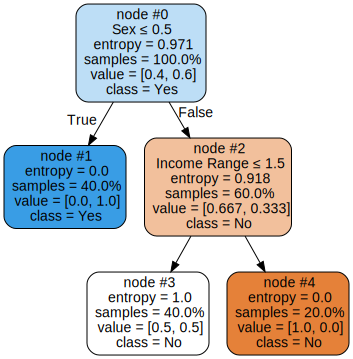

In [22]:
graph = graphviz.Source(dot_data) 
graph

In [26]:


def tree_to_code(tree, feature_names, label_encoders={}):
    from sklearn.tree import _tree

    '''
    Outputs a decision tree model as a Python function
    
    Parameters:
    -----------
    tree: decision tree model
        The decision tree to represent as a function
    feature_names: list
        The feature names of the dataset used for building the decision tree
    '''

    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    print("def decision_tree({}):".format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], depth + 1)
            print("{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        else:
            #print(node)
            
            name = tree_.feature[node] 
            if name in label_encoders:
                if isinstance(label_encoders[name] , LabelEncoder) or True:
                    print ("{}-return {}".format(indent, label_encoders[name].inverse_transform(tree_.value[node])))
                    return
            print("{}return {} # Distribution of samples in node".format(indent, tree_.value[node]))

    recurse(0, 1)

In [27]:
print("Decision Tree Rules")
print("="*32)
tree_to_code(clf, X_data.columns, label_encoders)

Decision Tree Rules
def decision_tree(Income Range, Sex, Age, Watch Promo):
  if Sex <= 0.5:
    return [[0. 4.]] # Distribution of samples in node
  else:  # if Sex > 0.5
    if Income Range <= 1.5:
      return [[2. 2.]] # Distribution of samples in node
    else:  # if Income Range > 1.5
      return [[2. 0.]] # Distribution of samples in node


In [28]:
label_encoders = create_label_encoder_dict(data2)
print("Encoded Values for each Label")
print("="*32)
for column in label_encoders:
    print("="*32)
    print('Encoder(%s) = %s' % (column, label_encoders[column].classes_ ))
    print(pd.DataFrame([range(0,len(label_encoders[column].classes_))], columns=label_encoders[column].classes_, index=['Encoded Values']  ).T)

Encoded Values for each Label
Encoder(Watch Promo) = ['No' 'Yes']
     Encoded Values
No                0
Yes               1
Encoder(Life Ins Promo) = ['No' 'Yes']
     Encoded Values
No                0
Yes               1
Encoder(Sex) = ['Female' 'Male']
        Encoded Values
Female               0
Male                 1
Encoder(Income Range) = ['20-30,000' '30-40,000' '40-50,000' '50-60,000']
           Encoded Values
20-30,000               0
30-40,000               1
40-50,000               2
50-60,000               3


## Evaluation

### Building a Confusion Matrix

NB. Data should be split in training and test data. The model built should be evaluated using unseen or test data

In [35]:
k=(clf.predict(X_test) == y_test) # Determine how many were predicted correctly

In [36]:
k.value_counts()

True     3
False    2
Name: Life Ins Promo, dtype: int64

In [37]:
from sklearn.metrics import confusion_matrix

In [38]:
cm=confusion_matrix(y_test, clf.predict(X_test), labels=y_test.unique())
cm

array([[1, 1],
       [1, 2]])

In [39]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    import itertools
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[1 1]
 [1 2]]


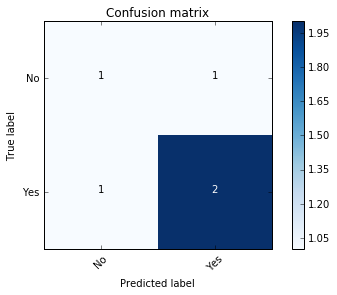

In [40]:
plot_confusion_matrix(cm,data2['Life Ins Promo'].unique())